<a href="https://colab.research.google.com/github/BarelHeby/Deep-Learning---Chest-X-Ray/blob/main/Deep_Learning_Chest_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
**FIRST SETUP**

In [1]:
!pip install -q kaggle
from google.colab import files

# Create a Kaggle API token and save it to a file.
!echo '{"username":"barelheby","key":"978bdd6cd1cc991c69bbe920fe75a9cc"}' > kaggle.json

# Copy the Kaggle API token file to the correct location.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

# Change the permissions of the Kaggle API token file.
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle.
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip the downloaded dataset.
!unzip chest-xray-pneumonia.zip

# Print the contents of the current working directory.
!ls


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

---
**IMPORTS**

In [2]:
import pandas as pd
from os.path import join
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet import ResNet152
from keras.layers import BatchNormalization,Dropout,Dense,Flatten
from tensorflow.keras.optimizers import Adamax,Adam
import os
import shutil
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
from sklearn.manifold import TSNE




---
 **Configuration**


In [3]:
TF_BATCH_SIZE = 32
TF_SEED = 123
IMG_HEIGHT = 256
IMG_WIDTH = 256
DIR_DATASET = "/content/chest_xray"

---
**Normalize Image Function**



---

**Training Set Preprocess**

In [ ]:
train_directory = join(DIR_DATASET,"train")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    subset = "training",
    seed = TF_SEED,
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = TF_BATCH_SIZE,
)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


---

**Validation Set Prep**

In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    validation_split=0.2,
    subset = "validation",
    seed = TF_SEED,
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = TF_BATCH_SIZE
)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [ ]:
train_dataset.class_names

['NORMAL', 'PNEUMONIA']

In [ ]:
# train_dataset = train_dataset.map(lambda x,y:(x/255.0,y))
# validation_dataset = validation_dataset.map(lambda x,y:(x/255.0,y))

---
**Part 1 Model**

In [ ]:
base_network = VGG16(weights="imagenet",include_top=False,input_shape = (IMG_HEIGHT,IMG_WIDTH,3),pooling="avg")
base_network.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_assigment_1  = Sequential(name="Assigment_1")
model_assigment_1.add(base_network)
model_assigment_1.add(Flatten())
model_assigment_1.add(Dense(512,activation="relu"))
model_assigment_1.add(Dropout(0.50))
model_assigment_1.add(Dense(128,activation="relu"))
model_assigment_1.add(Dropout(0.25))
model_assigment_1.add(Dense(60,activation="relu"))
model_assigment_1.add(Dense(1,activation="sigmoid"))
model_assigment_1.compile(optimizer=Adam(),loss='binary_crossentropy', metrics=['accuracy'])
model_assigment_1.summary()

Model: "Assigment_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 60)                

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
history = model_assigment_1.fit(train_dataset,
                        epochs= 20,
                        validation_data = validation_dataset,
                        callbacks = early_stopping)

Epoch 1/20
131/131 [==============================] - 64s 372ms/step - loss: 0.3917 - accuracy: 0.8548 - val_loss: 0.1423 - val_accuracy: 0.9473
Epoch 2/20
131/131 [==============================] - 38s 279ms/step - loss: 0.1647 - accuracy: 0.9319 - val_loss: 0.1266 - val_accuracy: 0.9521
Epoch 3/20
131/131 [==============================] - 38s 278ms/step - loss: 0.1414 - accuracy: 0.9415 - val_loss: 0.1272 - val_accuracy: 0.9444
Epoch 4/20
131/131 [==============================] - 38s 280ms/step - loss: 0.1204 - accuracy: 0.9554 - val_loss: 0.0937 - val_accuracy: 0.9674
Epoch 5/20
131/131 [==============================] - 39s 284ms/step - loss: 0.1302 - accuracy: 0.9504 - val_loss: 0.1242 - val_accuracy: 0.9473
Epoch 6/20
131/131 [==============================] - 37s 274ms/step - loss: 0.1039 - accuracy: 0.9600 - val_loss: 0.0846 - val_accuracy: 0.9703
Epoch 7/20
131/131 [==============================] - 37s 274ms/step - loss: 0.0905 - accuracy: 0.9660 - val_loss: 0.1010 - val_ac

In [ ]:
validation_loss, validation_accuracy = model_assigment_1.evaluate(validation_dataset)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

In [ ]:
model_assigment_1.save("model_assigment_1.keras")

In [ ]:
DIR_ASS_2 = join(DIR_DATASET,"assiment_2_dataset")
DIR_ASS_2_BACTERIA  = join(DIR_ASS_2,"BACTERIA")
DIR_ASS_2_VIRUS = join(DIR_ASS_2,"VIRUS")
DIR_ASS_2_NORMAL = join(DIR_ASS_2,"NORMAL")


In [ ]:
try:
  shutil.rmtree(DIR_ASS_2)
except Exception as e:
  print(e)
try:
  os.mkdir(DIR_ASS_2)
  os.mkdir(DIR_ASS_2_BACTERIA)
  os.mkdir(DIR_ASS_2_VIRUS)
  os.mkdir(DIR_ASS_2_NORMAL)
except Exception as e:
  print(e)

[Errno 2] No such file or directory: '/content/chest_xray/assiment_2_dataset'


---
**Copy Images From Source To New Folder**

Copy sick

In [ ]:
# prompt: copy all files from DIR_DATASET/test/PNEUMONIA to DIR_DATASET/assigment_2_dataset
source_dir = join(DIR_DATASET,"train","PNEUMONIA")
for filename in os.listdir(source_dir):
  if "bacteria" in filename.lower():
    dest_dir  = DIR_ASS_2_BACTERIA
  elif "virus" in filename.lower():
    dest_dir = DIR_ASS_2_VIRUS
  else:
    pass
  shutil.copy(join(source_dir,filename),dest_dir)



Copy normal

In [ ]:
source_dir = join(DIR_DATASET,"train","NORMAL")
for filename in os.listdir(source_dir):
  shutil.copy(join(source_dir,filename),DIR_ASS_2_NORMAL)

---
**Assigment 2 preprocess**

In [ ]:
train_dataset_ass_2 = tf.keras.utils.image_dataset_from_directory(
    DIR_ASS_2,
    validation_split=0.2,
    subset = "training",
    seed = TF_SEED,
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = TF_BATCH_SIZE,
    label_mode = "categorical",
)
validation_dataset_ass_2 = tf.keras.utils.image_dataset_from_directory(
    DIR_ASS_2,
    validation_split=0.2,
    subset = "validation",
    seed = TF_SEED,
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = TF_BATCH_SIZE,
    label_mode = "categorical",
)

Found 5216 files belonging to 3 classes.
Using 4173 files for training.
Found 5216 files belonging to 3 classes.
Using 1043 files for validation.


In [ ]:
train_dataset_ass_2.class_names

In [ ]:
# train_dataset_ass_2 = train_dataset_ass_2.map(lambda x,y:(x/255.0,y))
# validation_dataset_ass_2 = validation_dataset_ass_2.map(lambda x,y:(x/255.0,y))

In [ ]:
base_network_ass_2 = ResNet152(include_top=False,input_shape = (IMG_HEIGHT,IMG_WIDTH,3),pooling="avg")
base_network_ass_2.trainable = False

234698864/234698864 [==============================] - 2s 0us/step


In [ ]:
model_assigment_2  = Sequential(name="Assigment_2")
model_assigment_2.add(base_network_ass_2)
# model_assigment_2.add(BatchNormalization())
# model_assigment_2.add(Flatten())
# model_assigment_2.add(Dense(512,activation="relu"))
model_assigment_2.add(Dense(1024,activation="relu"))
model_assigment_2.add(Dropout(0.3))
# model_assigment_2.add(BatchNormalization())
model_assigment_2.add(Dense(512,activation="relu"))
# model_assigment_2.add(Dense(256,activation="relu"))
model_assigment_2.add(Dropout(0.2))
# model_assigment_2.add(Dense(128,activation="relu"))
model_assigment_2.add(Dense(64,activation="relu"))
model_assigment_2.add(Dense(3,activation="softmax"))
model_assigment_2.compile(optimizer=Adam(),loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model_assigment_2.summary()

Model: "Assigment_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 dense_4 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 3)                 

In [ ]:
early_stopping = EarlyStopping(monitor='val_categorical_accuracy', patience=5, restore_best_weights=True)
history_ass_2 = model_assigment_2.fit(train_dataset_ass_2,
                        epochs= 50,
                        validation_data = validation_dataset_ass_2,
                        callbacks = early_stopping)

Epoch 1/50
131/131 [==============================] - 80s 473ms/step - loss: 0.7158 - categorical_accuracy: 0.7033 - val_loss: 0.5433 - val_categorical_accuracy: 0.7785
Epoch 2/50
131/131 [==============================] - 50s 366ms/step - loss: 0.5095 - categorical_accuracy: 0.7764 - val_loss: 0.4759 - val_categorical_accuracy: 0.8006
Epoch 3/50
131/131 [==============================] - 49s 361ms/step - loss: 0.4871 - categorical_accuracy: 0.7872 - val_loss: 0.4811 - val_categorical_accuracy: 0.7939
Epoch 4/50
131/131 [==============================] - 49s 362ms/step - loss: 0.4671 - categorical_accuracy: 0.7994 - val_loss: 0.4883 - val_categorical_accuracy: 0.7862
Epoch 5/50
131/131 [==============================] - 49s 366ms/step - loss: 0.4515 - categorical_accuracy: 0.8133 - val_loss: 0.4550 - val_categorical_accuracy: 0.8102
Epoch 6/50
131/131 [==============================] - 49s 364ms/step - loss: 0.4342 - categorical_accuracy: 0.8172 - val_loss: 0.4886 - val_categorical_acc

In [ ]:
validation_loss, validation_accuracy = model_assigment_2.evaluate(validation_dataset_ass_2)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

In [ ]:
model_assigment_2.save("model_assigment_2.h5")

**Assigment 2**

---



Train The KNN Classifier Function

In [ ]:
def train_knn_by_model(model,train_data):
  X_train = []
  y_train = []
  for batch, label in train_data:
      X_train.append(model.predict(batch))
      y_train.append(label)
  X_train = np.concatenate(X_train)
  y_train = np.concatenate(y_train)
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train, y_train)
  return knn



Function To Classify New Image

In [ ]:
def classify(new_image_path,model,knn_model,class_names,assigment_number):
  new_image = Image.open(new_image_path)
  new_image = new_image.resize((IMG_WIDTH,IMG_HEIGHT))
  new_image_array = np.array(new_image)
  new_image_array = np.expand_dims(new_image_array,axis=0)
  new_image_array = np.expand_dims(new_image_array,axis=-1)
  new_image_array = np.repeat(new_image_array, 3, axis=-1)
  new_image_tensor = tf.convert_to_tensor(new_image_array,tf.float32)
  # Create the embedding vector for the image
  new_image_embedding = model.predict(new_image_tensor)
  print("New Image Embedding",new_image_embedding)
  # Use knn to predict
  y_pred_knn = knn_model.predict(new_image_embedding)
  if assigment_number==1:
    return class_names[y_pred_knn[0]]
  y_pred_knn = y_pred_knn[0]
  for i in range(len(y_pred_knn)):
    if int(y_pred_knn[i])==1:
      return class_names[i]

Predict New Image - Assigment 1.a

---



In [ ]:
knn_model_ass_1 = train_knn_by_model(model_assigment_1,train_dataset)

In [ ]:
ass_1_class_names = ["NORMAL","PNEUMONIA"]
img_1 = "/content/chest_xray/test/PNEUMONIA/person173_bacteria_830.jpeg"
print("Expected: PNEUMONIA, Got:", classify(img_1,model_assigment_1,knn_model_ass_1,ass_1_class_names,1))
img_2 = "/content/chest_xray/test/PNEUMONIA/person17_virus_48.jpeg"
print("Expected: PNEUMONIA, Got:", classify(img_2,model_assigment_1,knn_model_ass_1,ass_1_class_names,1))
img_3 = "/content/chest_xray/test/NORMAL/IM-0043-0001.jpeg"
print("Expected: NORMAL, Got:", classify(img_3,model_assigment_1,knn_model_ass_1,ass_1_class_names,1))

1/1 [==============================] - 0s 22ms/step
New Image Embedding [[1.]]
Expected: PNEUMONIA, Got: PNEUMONIA
1/1 [==============================] - 0s 18ms/step
New Image Embedding [[0.9999639]]
Expected: PNEUMONIA, Got: PNEUMONIA
1/1 [==============================] - 0s 19ms/step
New Image Embedding [[0.02433015]]
Expected: NORMAL, Got: NORMAL


Predict New Image Using KNN  

In [ ]:
knn_model_ass_2 = train_knn_by_model(model_assigment_2,train_dataset_ass_2)

1/1 [==============================] - 3s 3s/step


In [ ]:
img_1 = "/content/chest_xray/test/PNEUMONIA/person173_bacteria_830.jpeg"
print("Expected: BACTERIA, Got:", classify(img_1,model_assigment_2,knn_model_ass_2,train_dataset_ass_2.class_names,2))
img_2 = "/content/chest_xray/test/PNEUMONIA/person17_virus_48.jpeg"
print("Expected: VIRUS, Got:", classify(img_2,model_assigment_2,knn_model_ass_2,train_dataset_ass_2.class_names,2))
img_3 = "/content/chest_xray/test/NORMAL/IM-0011-0001.jpeg"
print("Expected: NORMAL, Got:", classify(img_3,model_assigment_2,knn_model_ass_2,train_dataset_ass_2.class_names,2))

1/1 [==============================] - 1s 858ms/step
New Image Embedding [[9.2696357e-01 2.3935957e-06 7.3033988e-02]]
Expected: BACTERIA, Got: BACTERIA
1/1 [==============================] - 0s 37ms/step
New Image Embedding [[0.5186558  0.00390507 0.4774391 ]]
Expected: VIRUS, Got: VIRUS
1/1 [==============================] - 0s 38ms/step
New Image Embedding [[0.1604642  0.7407988  0.09873704]]
Expected: NORMAL, Got: NORMAL


Create Scatter Plots

In [ ]:
embeddings_1 = model_assigment_1.predict(train_dataset)


131/131 [==============================] - 34s 246ms/step


In [ ]:

tsne_data_1 = TSNE(n_components=1,perplexity=15)
tsne_data_1 = tsne_data_1.fit_transform(embeddings_1)
df_1 = pd.DataFrame(tsne_data_1, columns=["x"])
X_1 = df_1["x"]

y_names_1 = [validation_dataset.class_names[0 if row <0.5 else 1] for row in tsne_data_1]
fig_1 = px.scatter(df_1, color=y_names_1, opacity=0.8)
fig_1.show()


In [ ]:
embeddings_2 = model_assigment_2.predict(train_dataset_ass_2)

131/131 [==============================] - 40s 296ms/step


In [ ]:

tsne_data_2 = TSNE(n_components=3,perplexity=15).fit_transform(embeddings_2)
df = pd.DataFrame(tsne_data_2, columns=["x", "y", "z"])
X = df["x"]
y = df["y"]
z = df["z"]

y_names = [validation_dataset_ass_2.class_names[np.argmax(row)] for row in tsne_data_2]
fig = px.scatter(x=X, y=y,  color=y_names, opacity=0.8)
fig.show()


**Assigment 3**

In [4]:
# prompt: Copy from train_directory_ass_3 to new folder all pictures under NORMAL folder

source_dir = join(DIR_DATASET,"train","NORMAL")
try:
  shutil.rmtree(join(DIR_DATASET,"train_directory_ass_3"))
except:
  pass
os.mkdir(join(DIR_DATASET,"train_directory_ass_3"))
os.mkdir(join(DIR_DATASET,"train_directory_ass_3","NORMAL"))
dest_dir = join(DIR_DATASET,"train_directory_ass_3","NORMAL")
for filename in os.listdir(source_dir):
  shutil.copy(join(source_dir,filename),dest_dir)
train_directory_ass_3 = join(DIR_DATASET,"train_directory_ass_3")

In [5]:
validation_directory_ass_3 = join(DIR_DATASET,"train")
train_dataset_ass_3 = tf.keras.utils.image_dataset_from_directory(
    train_directory_ass_3,
    validation_split=0.2,
    subset = "training",
    seed = TF_SEED,
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = TF_BATCH_SIZE,
)
validation_dataset_ass_3 = tf.keras.utils.image_dataset_from_directory(
    train_directory_ass_3,
    validation_split=0.2,
    subset = "validation",
    seed = TF_SEED,
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = TF_BATCH_SIZE
)

Found 1341 files belonging to 1 classes.
Using 1073 files for training.
Found 1341 files belonging to 1 classes.
Using 268 files for validation.


In [6]:
# prompt: use train_dataset_ass_3 and validation_dataset_ass_3 to create network that classify new images using anomaly detection

import pandas as pd
from keras.layers import Conv2D,UpSampling2D,Reshape
# BASE NETWORK
base_network_ass_3 = VGG16(include_top=False,input_shape = (IMG_HEIGHT,IMG_WIDTH,3),pooling="max")
base_network_ass_3.trainable = False
autoencoder   = Sequential(name="autoencoder_assigment_3")
autoencoder.add(base_network_ass_3)
autoencoder.add(Flatten())
autoencoder.add(Dense(32,activation="relu"))
autoencoder.add(Dense(8*8*512,activation="relu"))
autoencoder.add(Reshape((8,8,512)))
autoencoder.add(Conv2D(256,(3,3),activation="relu",padding="same"))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(128,(3,3),activation="relu",padding="same"))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(64,(3,3),activation="relu",padding="same"))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(3,(3,3),activation="relu",padding="same"))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(3,(3,3),activation="relu",padding="same"))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2D(3,(3,3),activation="sigmoid",padding="same"))
# autoencoder.add(Dense(60,activation="relu"))
# DECODER
# autoencoder.add(Dense(128,activation="relu"))
# autoencoder.add(Dense(512,activation="relu"))
# autoencoder.add(Dense(IMG_HEIGHT*IMG_WIDTH,activation="sigmoid"))
autoencoder.compile(optimizer="adam",loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()



58889256/58889256 [==============================] - 2s 0us/step
Model: "autoencoder_assigment_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 32768)             1081344   
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 256)         1179904   
                                            

In [96]:
# prompt: use train_dataset_ass_3 and validation_dataset_ass_3 to create network that classify new images using anomaly detection

import pandas as pd
from keras.layers import Conv2D,UpSampling2D,Reshape,Input,MaxPooling2D,Conv2DTranspose
# BASE NETWORK
base_network_ass_3 = VGG16(include_top=False,input_shape = (IMG_HEIGHT,IMG_WIDTH,3),pooling="max")
base_network_ass_3.trainable = False
autoencoder   = Sequential(name="autoencoder_assigment_3")
# autoencoder.add(base_network_ass_3)
autoencoder.add(Input((256,256,3)))
autoencoder.add(Conv2D(128,kernel_size=2,strides=(2,2),padding="same"))
# autoencoder.add(MaxPooling2D())
# autoencoder.add(Conv2D(3,(2,2),activation="relu",padding="same"))
# autoencoder.add(MaxPooling2D())
autoencoder.add(Conv2D(256,kernel_size=2,strides=(2,2),padding="same"))
autoencoder.add(BatchNormalization())
# autoencoder.add(MaxPooling2D())
autoencoder.add(Flatten())
autoencoder.add(Dense(150))
autoencoder.add(Dense(2048,"relu"))
# # autoencoder.add(Dense(32*32*2,activation="relu"))
# # autoencoder.add(Dense(8*8*512,activation="relu"))
autoencoder.add(Reshape((8,8,32)))
autoencoder.add(Conv2DTranspose(256,kernel_size=3,strides=4,padding="same",activation="relu"))
autoencoder.add(Conv2DTranspose(128,kernel_size=3,strides=4,padding="same",activation="relu"))
autoencoder.add(Conv2DTranspose(3,kernel_size=3,strides=2,padding="same",activation="relu"))

# autoencoder.add(Conv2D(3,(3,3),activation="relu",padding="same"))
# autoencoder.add(UpSampling2D((2,2)))
# autoencoder.add(Conv2D(3,(3,3),activation="relu",padding="same"))
# autoencoder.add(UpSampling2D((2,2)))
# autoencoder.add(Conv2D(4,(3,3),activation="relu",padding="same"))
# autoencoder.add(UpSampling2D((2,2)))
# autoencoder.add(Conv2D(3,(3,3),activation="sigmoid",padding="same"))
autoencoder.compile(optimizer="adam",loss='mse', metrics=['accuracy'])
autoencoder.summary()



Model: "autoencoder_assigment_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_123 (Conv2D)         (None, 128, 128, 128)     1664      
                                                                 
 conv2d_124 (Conv2D)         (None, 64, 64, 256)       131328    
                                                                 
 batch_normalization_6 (Bat  (None, 64, 64, 256)       1024      
 chNormalization)                                                
                                                                 
 flatten_23 (Flatten)        (None, 1048576)           0         
                                                                 
 dense_57 (Dense)            (None, 150)               157286550 
                                                                 
 dense_58 (Dense)            (None, 2048)              309248    
                                           

In [118]:
autoencoder   = Sequential(name="autoencoderr_assigment_3")
autoencoder.add(Input((256,256,3)))
# Encoder
autoencoder.add(Conv2D(32,3,activation="relu",padding="same"))
autoencoder.add(MaxPooling2D(2,padding="same"))
autoencoder.add(Conv2D(16,3,activation="relu",padding="same"))
autoencoder.add(MaxPooling2D(2,padding="same"))
# Decoder
autoencoder.add(Conv2D(16,3,activation="relu",padding="same"))
autoencoder.add(UpSampling2D(2))
autoencoder.add(Conv2D(32,3,activation="relu",padding="same"))
autoencoder.add(UpSampling2D(2))
# Output
autoencoder.add(Conv2D(3,3,activation="sigmoid",padding="same"))

autoencoder.compile(optimizer="adam",loss='mse')
autoencoder.summary()

Model: "autoencoderr_assigment_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_139 (Conv2D)         (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_140 (Conv2D)         (None, 128, 128, 16)      4624      
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_141 (Conv2D)         (None, 64, 64, 16)        2320      
                                                                 
 up_sampling2d_42 (UpSampli  (None, 128, 1

In [120]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data_ass_3 = datagen.flow_from_directory(train_directory_ass_3,
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode="input",
                                               subset="training"
                                               )
val_data_ass_3 = datagen.flow_from_directory(train_directory_ass_3,
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode="input",
                                               subset="validation"
                                               )

Found 1073 images belonging to 1 classes.
Found 268 images belonging to 1 classes.


In [121]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_ass_3 = autoencoder.fit(train_data_ass_3,
                        epochs= 20,
                        shuffle = True,
                        validation_data = val_data_ass_3,
                        callbacks = [early_stopping])

Epoch 1/20
34/34 [==============================] - 27s 778ms/step - loss: 0.0233 - val_loss: 0.0053
Epoch 2/20
34/34 [==============================] - 25s 739ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 3/20
34/34 [==============================] - 25s 726ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4/20
34/34 [==============================] - 25s 741ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 5/20
34/34 [==============================] - 25s 736ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 6/20
34/34 [==============================] - 25s 745ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 7/20
34/34 [==============================] - 25s 723ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 8/20
34/34 [==============================] - 25s 738ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/20
34/34 [==============================] - 25s 729ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/20
34/34 [==============================] - 26s 761ms/step - loss: 0.0017 - val_lo

In [82]:
test_directory = join(DIR_DATASET,"test")
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    # validation_split=0.2,
    # subset = "training",
    # seed = TF_SEED,
    image_size = (IMG_HEIGHT,IMG_WIDTH),
    batch_size = TF_BATCH_SIZE,
    label_mode="binary",

)

Found 624 files belonging to 2 classes.


In [129]:
# prediction_test = autoencoder.predict(test_dataset)
prediction_train = autoencoder.predict(train_data_ass_3)

34/34 [==============================] - 23s 672ms/step


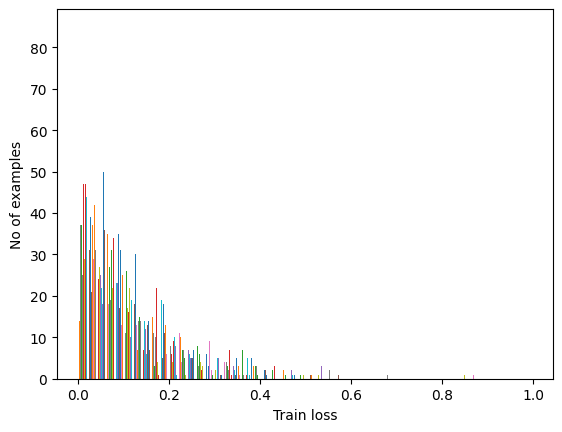

In [131]:
iterator = iter(train_data_ass_3)
val, first_label = next(iterator)
train_loss = tf.keras.losses.mae(prediction_train[0], val[0])
train_loss
plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [132]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.22053345


In [162]:
def is_normal(model,data,threshold):
  prediction = model.predict(data)
  # print(prediction)
  loss = tf.keras.losses.mae(prediction[0],data)
  return tf.math.less(loss,threshold)

In [163]:
iterator =iter(test_dataset)
for i in range(10):
  val, lbl = next(iterator)
  # print(val[i].numpy().shape)
  pred = is_normal(autoencoder,val[i],threshold)
  # r= np.array(t)
  # print(pred)
  break

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "autoencoderr_assigment_3" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(32, 256, 3)


In [137]:

pred = is_normal(autoencoder,test_dataset.as_numpy_iterator(),threshold)

20/20 [==============================] - 2s 105ms/step


ValueError: Attempt to convert a value (<tensorflow.python.data.ops.dataset_ops.NumpyIterator object at 0x7a04aebcd180>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.NumpyIterator'>) to a Tensor.

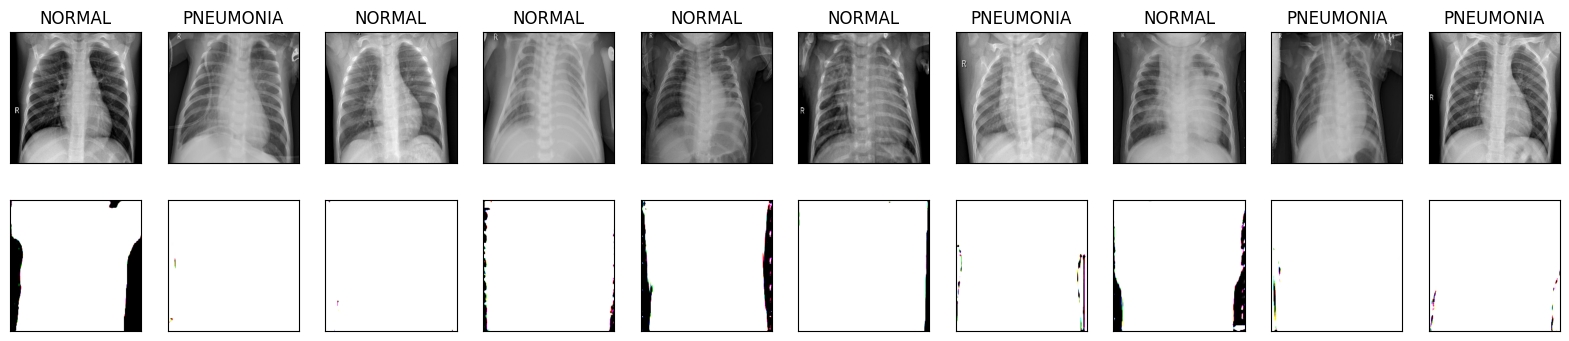

In [117]:
# prompt: show the first 10 images in the prediction and the val_data_ass_3 in 2 rows

import matplotlib.pyplot as plt
import tensorflow as tf
n = 10

plt.figure(figsize=(20, 4))
iterator = iter(test_dataset)
for i in range(n):

    val, first_label = next(iterator)
    # print(test_dataset.class_names[int(first_label.numpy()[1][0])])
    # break
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(val[i].numpy().astype("uint8"), cmap='gray')
    # plt.imshow(tf.squeeze(val[i]))
    plt.title(test_dataset.class_names[int(first_label.numpy()[1][0])])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(prediction_test[i], cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()



In [104]:
validation_loss, validation_accuracy = autoencoder.evaluate(test_dataset)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)
# model_assigment_3.save("model_assigment_3.keras")
# Create Scatter Plots
# embeddings_3 = model_assigment_3.predict(train_dataset_ass_3)


# tsne_data_3 = TSNE(n_components=1,perplexity=15)
# tsne_data_3 = tsne_data_3.fit_transform(embeddings_3)
# df_3 = pd.DataFrame(tsne_data_3, columns=["x"])
# X_3 = df_3["x"]

# y_names_3 = [validation_dataset_ass_3.class_names[0] if row <0.5  else "SICK" for row in tsne_data_3]
# fig_3 = px.scatter(df_3, color=y_names_3, opacity=0.8)
# fig_3.show()

InvalidArgumentError: Graph execution error:

Detected at node mean_squared_error/SquaredDifference defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-104-ec3987f32a42>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 1706, in mean_squared_error

Detected at node mean_squared_error/SquaredDifference defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-104-ec3987f32a42>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 1706, in mean_squared_error

2 root error(s) found.
  (0) INVALID_ARGUMENT:  required broadcastable shapes
	 [[{{node mean_squared_error/SquaredDifference}}]]
	 [[mean_squared_error/cond/then/_0/mean_squared_error/cond/cond/then/_50/mean_squared_error/cond/cond/remove_squeezable_dimensions/cond/pivot_f/_129/_101]]
  (1) INVALID_ARGUMENT:  required broadcastable shapes
	 [[{{node mean_squared_error/SquaredDifference}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_47748]